# 1. IMPORTING THE LIBRARIES

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. LOADING DATASET

In [3]:
pd.read_csv('supermarket_sales.csv')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df = pd.read_csv('supermarket_sales.csv')

# 3. EXPLORATORY SOME INFORMATION ABOUT DATASET

## SOME INFORMATION ABOUT DATASET

In [29]:
df.shape
print('Number of rows are', df.shape[0] ,'and number of columns are:' , df.shape[1])

Number of rows are 1000 and number of columns are: 17


In [24]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [25]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

## DATA ANALYSIS REPORT

### 1. What is the duration report?

In [12]:
Min_Date = df.Date.min()
Max_Date = df.Date.max()
print('This report is from ' + Min_Date + 'to ' + Max_Date)

This report is from 1/1/2019to 3/9/2019


### 2. What is the total order in this duration?

In [21]:
Order_ID_Count = df['Invoice ID'].count().astype(str)
print('The total orders in this period are ' + Order_ID_Count)

The total orders in this period are 1000


### 3. What is the total sales in this duration?

In [1201]:
Total_sales = df['Total'].sum().round(2)
print('The total sales in this period is',Total_sales)

The total sales in this period is 322966.75


### 4. What is the total income in this duration?

In [1200]:
Total_income = df['gross income'].sum().round(2)
print('The total income in this period is',Total_income)

The total income in this period is 15379.37


### 5. What product line are our business in this duration?

In [58]:
Total_product_line = df['Product line'].unique()
Total_product_lines = ', '.join(map(str,Total_product_line))
print('The product lines of our business are:',Total_product_lines)

The product lines of our business are: Health and beauty, Electronic accessories, Home and lifestyle, Sports and travel, Food and beverages, Fashion accessories


### 6. Which cities are we doing business?

In [60]:
city = df['City'].unique()
cities = ', '.join(map(str,city))
print('The cities where we doing business are:',cities)

The cities where we doing business are: Yangon, Naypyitaw, Mandalay


### 7. Which payments do we accept in business?

In [61]:
payment = df['Payment'].unique()
payments = ', '.join(map(str,payment))
print('The payment methods which we accept in business are:',payments)

The payment methods which we accept in business are: Ewallet, Cash, Credit card


## ABOUT TOTAL ORDERS

### 1. Total orders by branches?

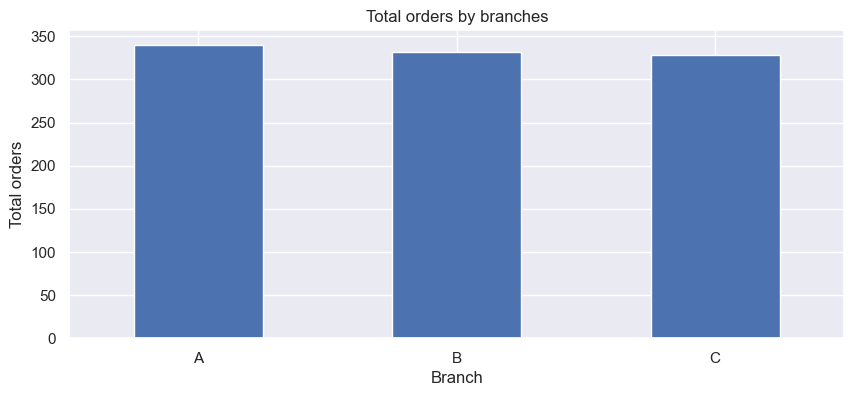

In [1202]:
total_orders_by_branches = df.groupby(['Branch'])['Invoice ID'].count()

total_orders_by_branches.plot(kind='bar',xlabel='Branch',ylabel='Total orders',
                              title='Total orders by branches',figsize=(10,4),grid='true',rot=0)

### 2. Total orders by cities?

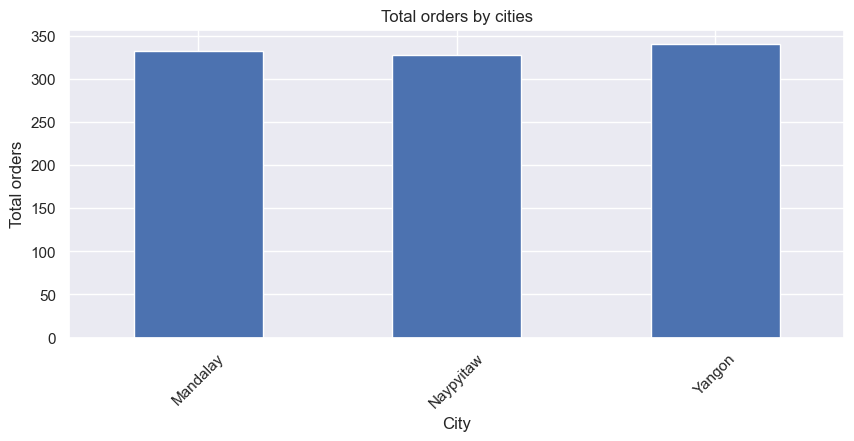

In [1203]:
total_orders_by_cities = df.groupby(['City'])['Invoice ID'].count()
total_orders_by_cities.plot(kind='bar',xlabel='City',ylabel='Total orders',
                              title='Total orders by cities',figsize=(10,4),grid='true',rot=45)

### 3. Total orders by customer types?

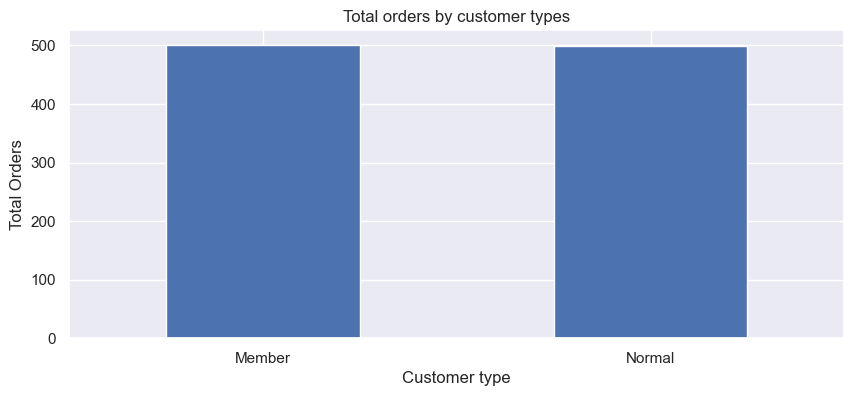

In [1204]:
total_orders_by_customer_types = df.groupby(['Customer type'])['Invoice ID'].count()
total_orders_by_customer_types.plot(kind='bar',xlabel='Customer type',ylabel='Total Orders',
                                   title='Total orders by customer types',figsize=(10,4),grid='true',rot=0)

### 4. Total orders by gender?

<AxesSubplot:title={'center':'Total orders by genders'}, xlabel='Gender', ylabel='Total Orders'>

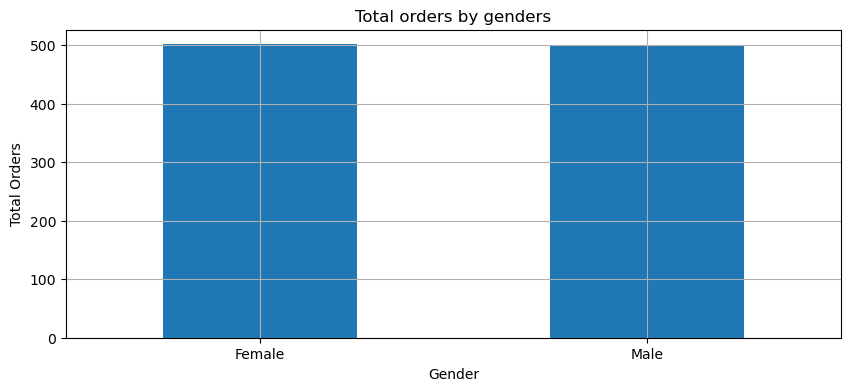

In [134]:
total_orders_by_genders = df.groupby(['Gender'])['Invoice ID'].count()
total_orders_by_genders.plot(kind='bar',xlabel='Gender',ylabel='Total Orders',
                                   title='Total orders by genders',figsize=(10,4),grid='true',rot=0)

### 5. Total orders by product lines?

<AxesSubplot:title={'center':'Total orders by product lines'}, ylabel='Product line'>

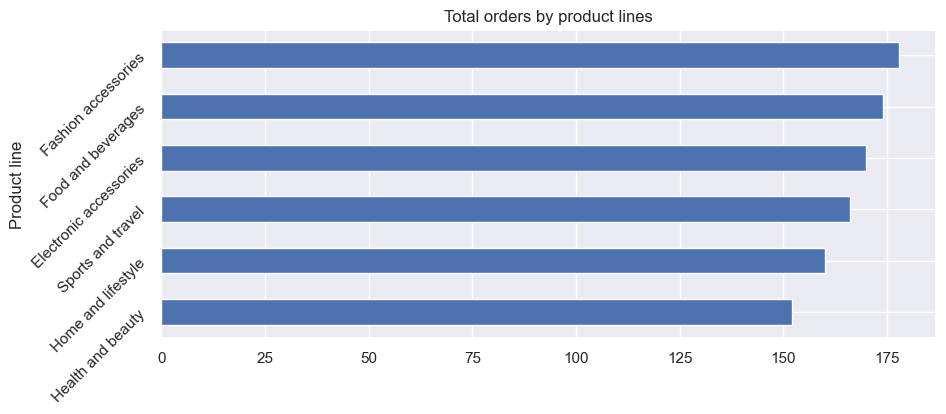

In [1206]:
total_orders_by_product_line = df.groupby(['Product line'])['Invoice ID'].count()
total_orders_by_product_line.sort_values(ascending=True).plot(kind='barh',xlabel='Product line',ylabel='Total Orders',
                                   title='Total orders by product lines',figsize=(10,4),grid='true',rot=45)

### 6. Total orders by payment methods?

<AxesSubplot:title={'center':'Total orders by payments'}, xlabel='Payment method', ylabel='Total Orders'>

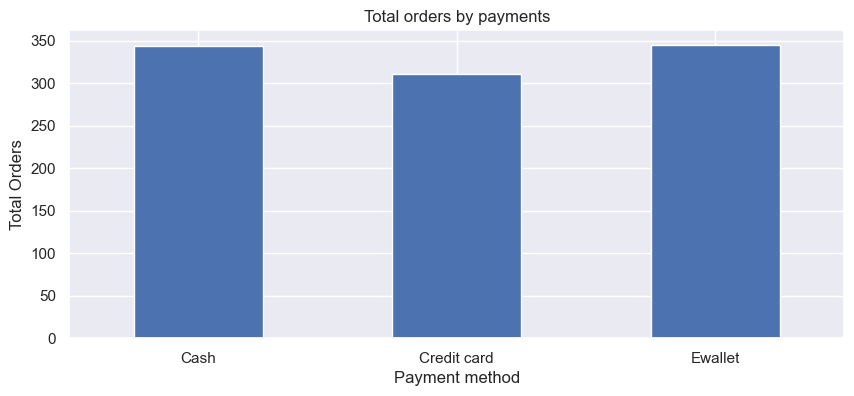

In [1207]:
Total_orders_by_payment = df.groupby(['Payment'])['Invoice ID'].count()
Total_orders_by_payment.plot(kind='bar',xlabel='Payment method',ylabel='Total Orders',
                                   title='Total orders by payments',figsize=(10,4),grid='true',rot=0)

## ABOUT TOTAL SALES

### 1A. Total sales by branches?

<AxesSubplot:title={'center':'Total sales by branches'}, ylabel='Branch'>

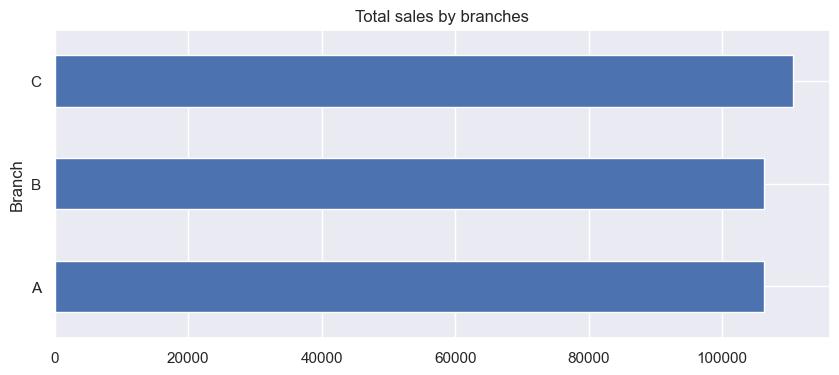

In [1208]:
total_sales_by_branches = df.groupby(['Branch'])['Total'].sum()
total_sales_by_branches.plot(kind='barh',xlabel='Branch',ylabel='Total sales',title='Total sales by branches',
                            figsize=(10,4),grid='true')

### 1B. Total sales by branches into percentage ?

In [206]:
## create a table : sales by branches
total_sales_by_branches = df.groupby(['Branch'])['Total'].sum()
### create a table: total sales of all branches
total_sales = total_sales_by_branches.sum()
### create a sales by branches in percentage
total_sales_by_branches_per = total_sales_by_branches / total_sales *100
total_sales_by_branches_per

Branch
A    32.882757
B    32.881921
C    34.235322
Name: Total, dtype: float64

In [213]:
## quick solution as the above methods
# df.groupby(['Branch'])['Total'].sum() / df.groupby(['Branch'])['Total'].sum().sum() * 100
## round the columns
#(df.groupby(['Branch'])['Total'].sum() / df.groupby(['Branch'])['Total'].sum().sum() * 100).round(0)
## add percentage (%) character
(df.groupby(['Branch'])['Total'].sum() / df.groupby(['Branch'])['Total'].sum().sum() * 100).round(0).astype(str) + '%'

Branch
A    33.0%
B    33.0%
C    34.0%
Name: Total, dtype: object

### 2A. Total sales by customer types?

<AxesSubplot:title={'center':'Total sales by branches'}, ylabel='Customer Type'>

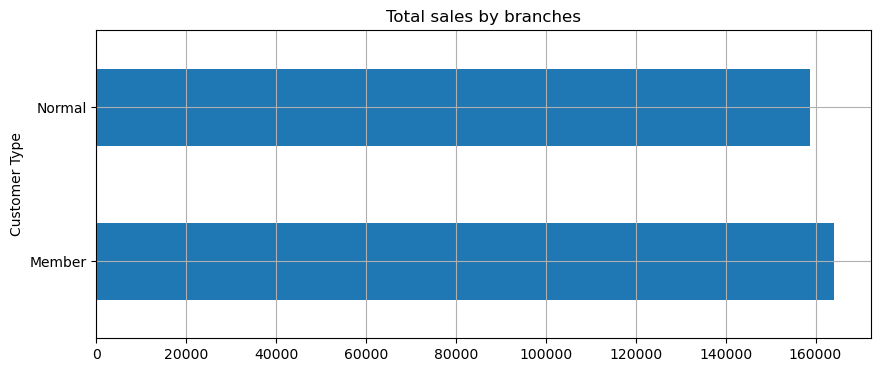

In [227]:
total_sales_by_customer_types = df.groupby(['Customer type'])['Total'].sum()
total_sales_by_customer_types.plot(kind='barh',xlabel='Customer Type',ylabel='Total sales',title='Total sales by branches',
                                  figsize=(10,4),grid='true')

### 2B. Total sales by customer types into percentage ?

In [226]:
(df.groupby(['Customer type'])['Total'].sum() / df['Total'].sum() * 100).round(0).astype(str) + '%'

Customer type
Member    51.0%
Normal    49.0%
Name: Total, dtype: object

### 3A. Total sales by genders?

<AxesSubplot:title={'center':'Total sales by genders'}, ylabel='Customer Type'>

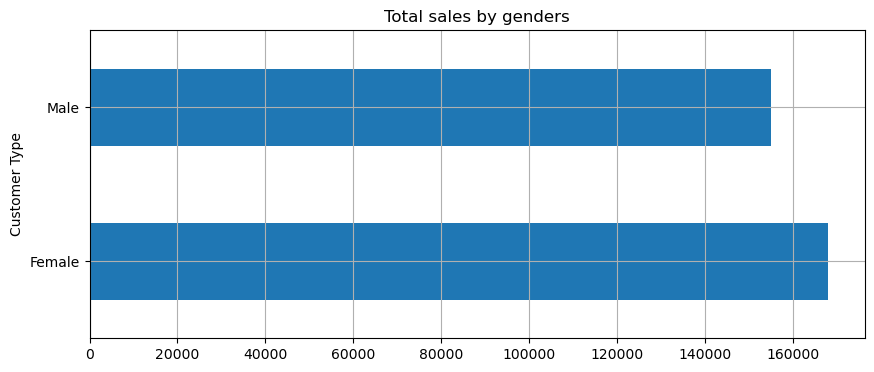

In [235]:
Total_sales_by_genders = df.groupby(['Gender'])['Total'].sum()
Total_sales_by_genders.plot(kind='barh',xlabel='Customer Type',title='Total sales by genders',
                           grid='true',figsize=(10,4))

### 3B. Total sales by genders in percentage?

In [247]:
(df.groupby(['Gender'])['Total'].sum() / df['Total'].sum() * 100).round(1).astype(str) + '%'

Gender
Female    52.0%
Male      48.0%
Name: Total, dtype: object

### 4A. Total sales by product lines?

<AxesSubplot:title={'center':'Total sales by product lines'}, ylabel='Product line'>

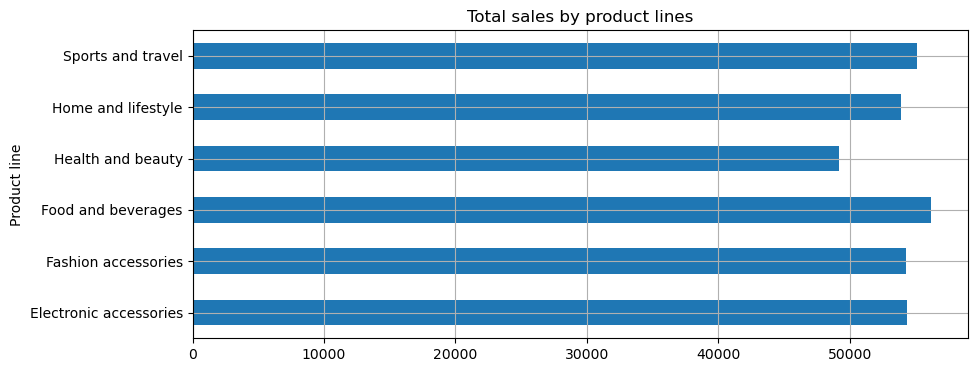

In [243]:
(df.groupby(['Product line'])['Total'].sum()).plot(kind='barh',title='Total sales by product lines',
                                                  figsize=(10,4),grid='true')

### 4B. Total sales by product lines (in percentage)?

In [246]:
(df.groupby(['Product line'])['Total'].sum()/df['Total'].sum()*100).round(2).astype(str) + '%'

Product line
Electronic accessories    16.82%
Fashion accessories       16.81%
Food and beverages        17.38%
Health and beauty         15.23%
Home and lifestyle        16.68%
Sports and travel         17.07%
Name: Total, dtype: object

### 5A. Total sales by payments?

<AxesSubplot:title={'center':'Total sales by payment'}, ylabel='Payment'>

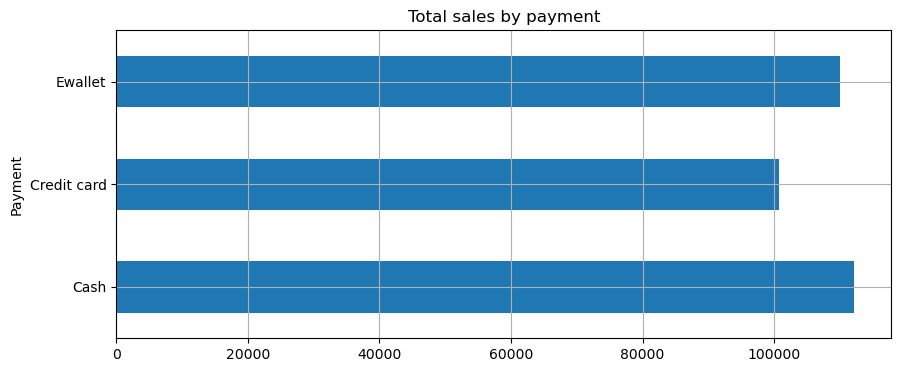

In [252]:
df.groupby(['Payment'])['Total'].sum().plot(kind='barh',title='Total sales by payment',figsize=(10,4),grid='true')

### 5B. Total sales by payments (in percentage)?

In [266]:
(100*df.groupby(['Payment'])['Total'].sum()/df['Total'].sum()).round(1).astype(str) + '%'

Payment
Cash           34.7%
Credit card    31.2%
Ewallet        34.1%
Name: Total, dtype: object

## ABOUT TOTAL INCOME

### 1A. Total income by branches?

<AxesSubplot:title={'center':'Total income by branches'}, xlabel='Branch', ylabel='gross income'>

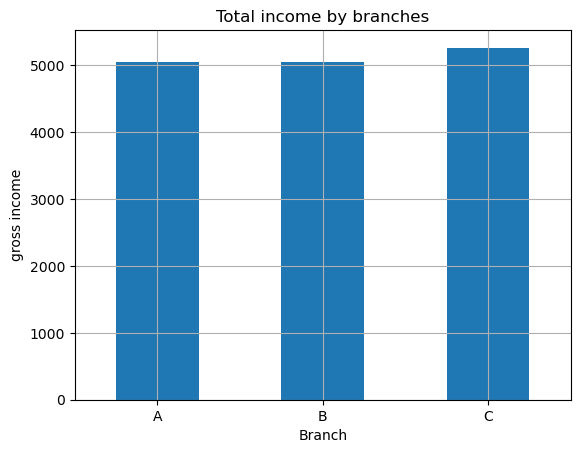

In [347]:
df.groupby(['Branch']).sum()['gross income'].plot(kind='bar',grid=True,rot=0,title='Total income by branches',
                                                 ylabel='gross income')

### 1B. Total income by branches (in percentage)?

In [360]:
(100*df.groupby(['Branch']).sum()['gross income']/df.sum()['gross income']).round(1).astype(str)+'%'

Branch
A    32.9%
B    32.9%
C    34.2%
Name: gross income, dtype: object

### 2A. Total income by cities?

<AxesSubplot:title={'center':'Total income by cities'}, xlabel='City', ylabel='gross income'>

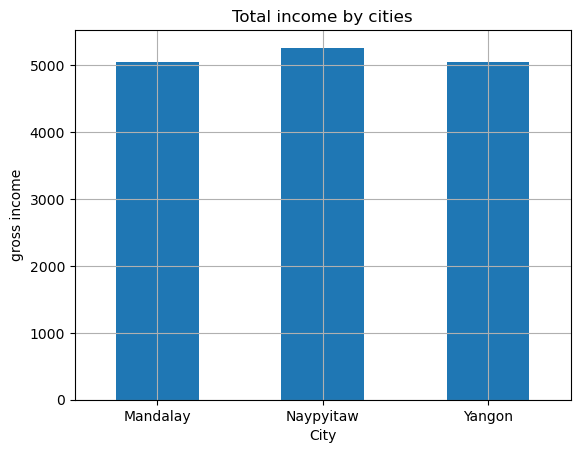

In [348]:
df.groupby(['City']).sum()['gross income'].plot(kind='bar',grid=True,rot=0,title='Total income by cities',
                                                 ylabel='gross income')

### 2B. Total income by cities (in percentage)?

In [362]:
(100*df.groupby(['City']).sum()['gross income']/df['gross income'].sum()).round(1).astype(str)+'%'

City
Mandalay     32.9%
Naypyitaw    34.2%
Yangon       32.9%
Name: gross income, dtype: object

### 3A. Total income by customer type?

<AxesSubplot:title={'center':'Total income by customer types'}, xlabel='Customer type', ylabel='gross income'>

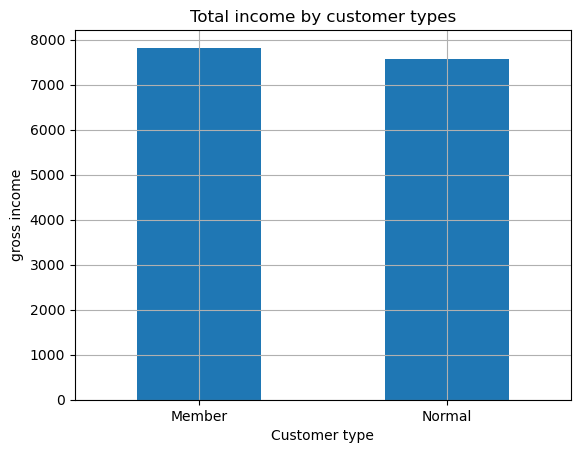

In [367]:
df.groupby(['Customer type']).sum()['gross income'].plot(kind='bar',grid=True,rot=0,title='Total income by customer types',
                                                 ylabel='gross income')

### 3B. Total income by customer type (in percentage)?

In [364]:
(100*df.groupby(['Customer type']).sum()['gross income']/df['gross income'].sum()).round(1).astype(str)+'%'

Customer type
Member    50.8%
Normal    49.2%
Name: gross income, dtype: object

### 4A. Total income by gender?

<AxesSubplot:title={'center':'Total income by customer types'}, xlabel='Gender', ylabel='gross income'>

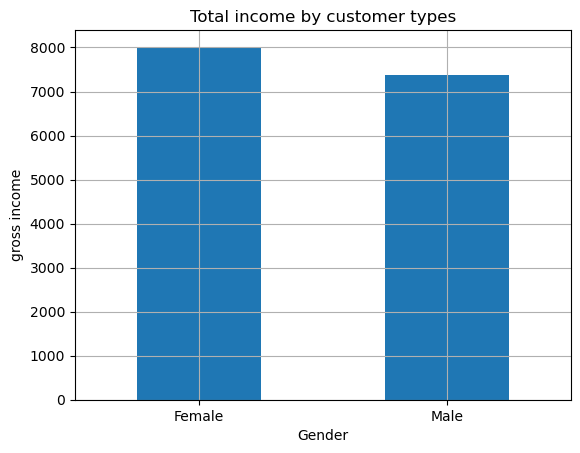

In [368]:
df.groupby(['Gender']).sum()['gross income'].plot(kind='bar',grid=True,rot=0,title='Total income by customer types',
                                                 ylabel='gross income')

### 4B. Total income by gender (in percentage)?

In [369]:
(100*df.groupby(['Gender']).sum()['gross income']/df['gross income'].sum()).round(1).astype(str)+'%'

Gender
Female    52.0%
Male      48.0%
Name: gross income, dtype: object

### 5A. Total income by payment?

In [371]:
total_income_by_payment = df.groupby(['Payment']).sum()['gross income']

<function matplotlib.pyplot.show(close=None, block=None)>

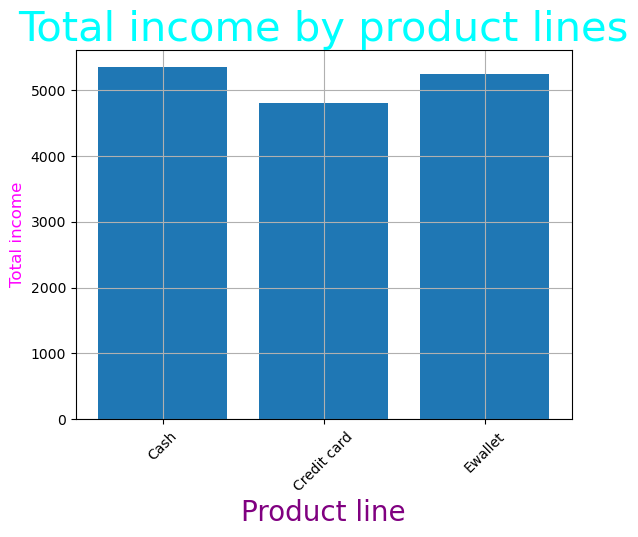

In [382]:
### plot the X values vs. the Y values: plot(x,y)
plt.bar(x=payments, height =total_income_by_payment)
### define the xstick
payments = [payment for payment, income in total_income_by_payment.items()]
plt.xticks(payments,rotation=45,size=10)
### rename the label of axis
plt.xlabel('Product line',fontsize=20,color='purple')
plt.ylabel('Total income',fontsize=12,color='fuchsia')
### rename the title of plot
plt.title('Total income by product lines',fontsize=30,color='cyan')
### grid on
plt.grid(True)
### create a chart as the aboved formats
plt.show

### 5B. Total income by payment (in percentage)?

In [380]:
(100*df.groupby(['Payment']).sum()['gross income']/df['gross income'].sum()).round(1).astype(str)+'%'

Payment
Cash           34.7%
Credit card    31.2%
Ewallet        34.1%
Name: gross income, dtype: object

### 6A. Total income by product lines?

In [383]:
total_income_by_product_line = df.groupby(['Product line']).sum()['gross income']
total_income_by_product_line

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

In [291]:
## how to create a list of columns which has the same order as the column of the aboved table
product_lines = []
for product_line, income in total_income_by_product_line.items():
    product_lines.append(product_line)
print(product_lines)

['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel']


In [294]:
## other solution as the aboved method
product_lines = [product_line for product_line, income in total_income_by_product_line.items()]
product_lines

['Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel']

<function matplotlib.pyplot.show(close=None, block=None)>

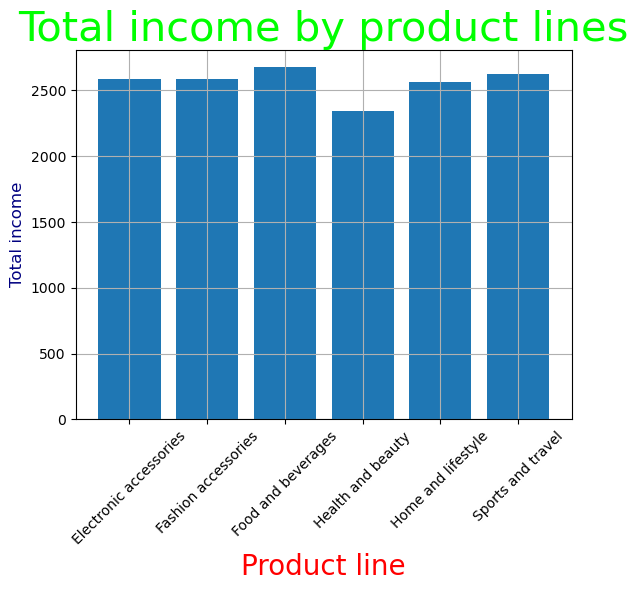

In [384]:
### plot the X values vs. the Y values: plot(x,y)
plt.bar(x=product_lines, height =total_income_by_product_line)
### define the xstick
product_lines = [product_line for product_line, income in total_income_by_product_line.items()]
plt.xticks(product_lines,rotation=45,size=10)
### rename the label of axis
plt.xlabel('Product line',fontsize=20,color='red')
plt.ylabel('Total income',fontsize=12,color='navy')
### rename the title of plot
plt.title('Total income by product lines',fontsize=30,color='lime')
### grid on
plt.grid(True)
### create a chart as the aboved formats
plt.show

### 6B. Total income by product lines (in percentage)?

In [1209]:
((100*df.groupby(['Product line']).sum()['gross income']/df['gross income'].sum()).round(1).astype(str)+'%').sort_values(ascending=False)

Product line
Food and beverages        17.4%
Sports and travel         17.1%
Electronic accessories    16.8%
Fashion accessories       16.8%
Home and lifestyle        16.7%
Health and beauty         15.2%
Name: gross income, dtype: object

In [390]:
pie = (100*df.groupby(['Product line']).sum()['gross income']/df['gross income'].sum()).round(1)

<AxesSubplot:title={'center':'Total income by product lines'}, ylabel='gross income'>

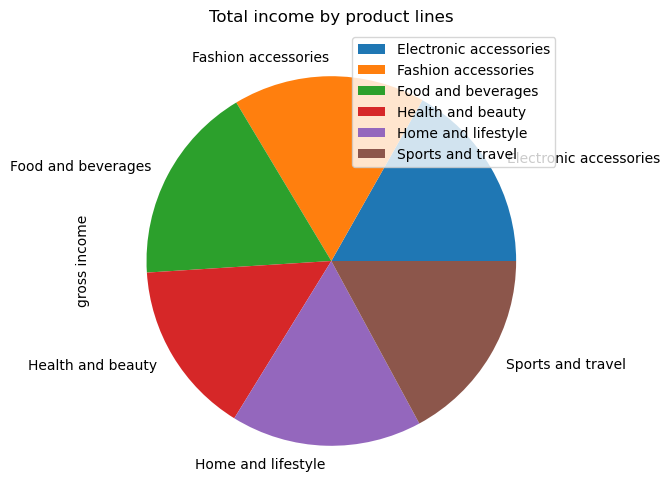

In [398]:
pie.plot(kind='pie',legend='True',figsize=(8,6),title='Total income by product lines',fontsize=10)

## ABOUT A TREND OF TOTAL SALES, TOTAL ORDERS AND TOTAL INCOME

### Add the 'day' and 'month' columns from 'date' column

In [401]:
# check the current type of 'Date' coulumn
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [751]:
## The ways to convert pandas column to Datetime
#1. df['Date'].astype('datetime64[ns]')
#2. pd.to_datetime(df['Date'])
df['Date']=pd.to_datetime(df['Date'])

In [407]:
## check the new type of 'Date' coulumn
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [752]:
## The ways to get month, year, weekday in pandas
## 1st
#1. Year: df['Date'].dt.year
#2. Month: df['Date'].dt.month
#3. Day: df['Date'].dt.day
#4. Weekday: df['Date'].dt.weekday (0=Monday...6=Sunday)
## 2nd
#1. Year: pd.DatetimeIndex(df.Date).year
#2. Month: pd.DatetimeIndex(df.Date).month
#3. Day: pd.DatetimeIndex(df.Date).day
#4. Weekday: pd.DatetimeIndex(df.Date).weekday

df['month'] = df['Date'].dt.month

### 1. Total orders, sales and income over 3 months?

<AxesSubplot:title={'center':'Total orders over months'}, xlabel='month', ylabel='Total Orders'>

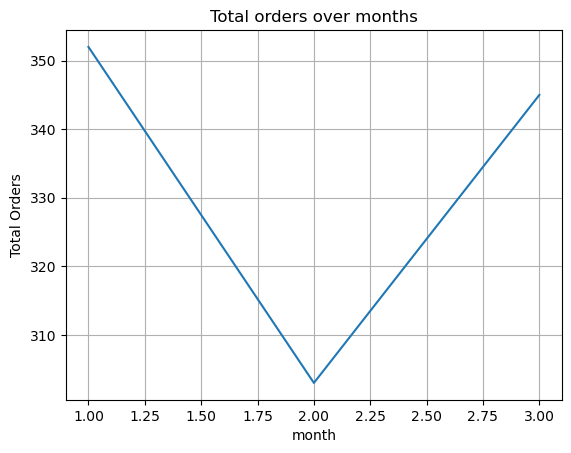

In [505]:
# Total order over months plot
(df.groupby('month').count()['Invoice ID']).plot(title='Total orders over months',ylabel='Total Orders',grid='true')

<AxesSubplot:title={'center':'Total sales over months'}, xlabel='month', ylabel='Total Sales'>

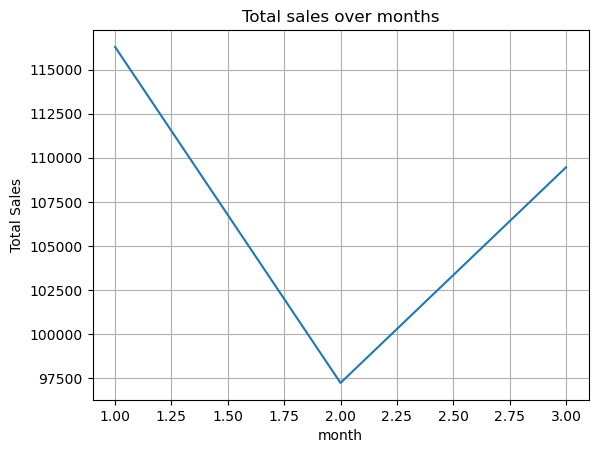

In [504]:
# Total sales over months plot
(df.groupby('month').sum()['Total']).plot(title='Total sales over months',ylabel='Total Sales',grid='true')

<AxesSubplot:title={'center':'Total income over months'}, xlabel='month', ylabel='Total Income'>

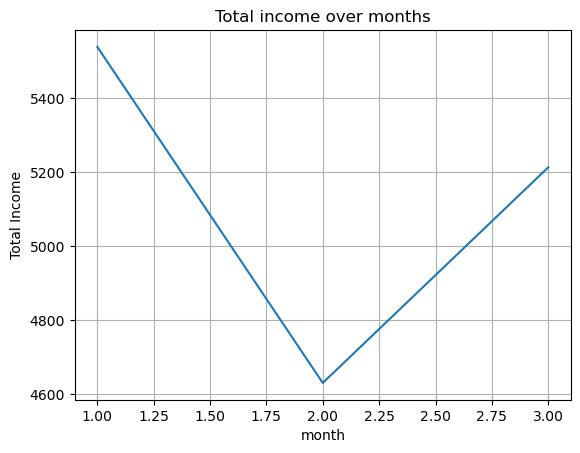

In [507]:
# Total income over months plot
(df.groupby('month').sum()['gross income']).plot(title='Total income over months',ylabel='Total Income',grid='true')

### 2. Total orders, sales and income by Branches over 3 months?

In [580]:
### how to filter row with the codition
# df_A = df.loc[df['Branch']=='A']
# df_A = df.loc[df['Branch']=='B']
# df_A = df.loc[df['Branch']=='C']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,2
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,4.761905,14.1400,4.5,3,3
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8,3,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

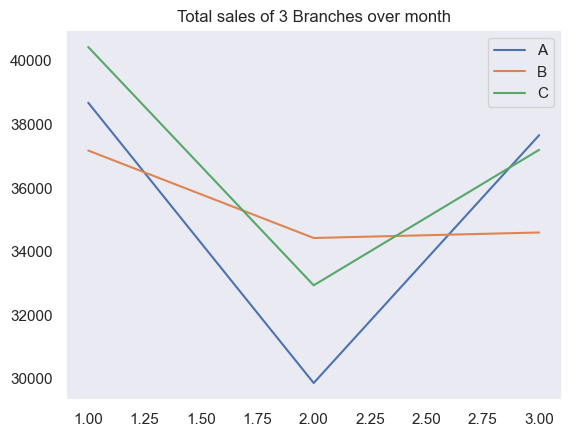

In [753]:
Sales_A_df = df.loc[df['Branch']=='A'].groupby(['month']).sum()['Total']
Sales_B_df = df.loc[df['Branch']=='B'].groupby(['month']).sum()['Total']
Sales_C_df = df.loc[df['Branch']=='C'].groupby(['month']).sum()['Total']
months = []
for month, sales in Sales_A_df.items():
    months.append(month)

plt.plot(months,Sales_A_df,label = 'A')
plt.plot(months,Sales_B_df,label = 'B')
plt.plot(months,Sales_C_df,label = 'C')
plt.title('Total sales of 3 Branches over month')
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

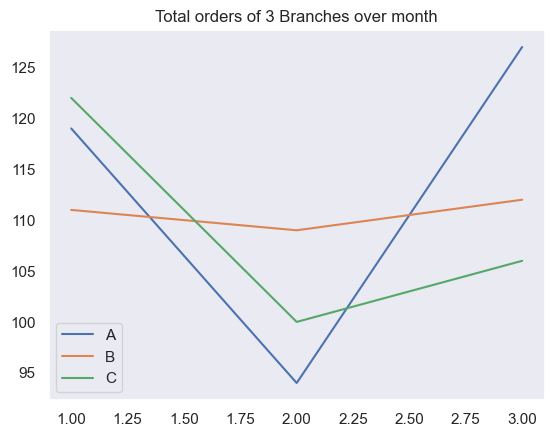

In [754]:
Orders_A_df = df.loc[df['Branch']=='A'].groupby(['month']).count()['Invoice ID']
Orders_B_df = df.loc[df['Branch']=='B'].groupby(['month']).count()['Invoice ID']
Orders_C_df = df.loc[df['Branch']=='C'].groupby(['month']).count()['Invoice ID']
months = []
for month, Orders in Orders_A_df.items():
    months.append(month)

plt.plot(months,Orders_A_df,label = 'A')
plt.plot(months,Orders_B_df,label = 'B')
plt.plot(months,Orders_C_df,label = 'C')
plt.title('Total orders of 3 Branches over month')
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

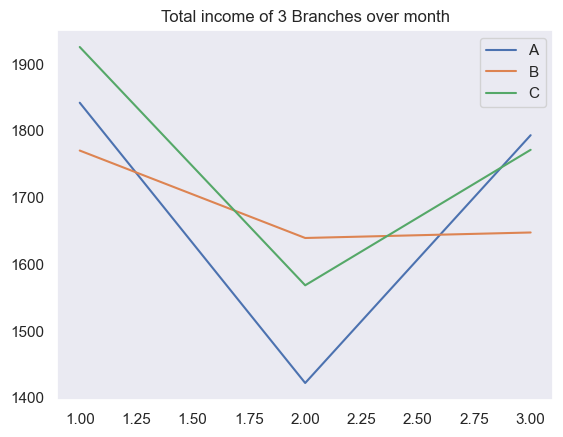

In [755]:
Income_A_df = df.loc[df['Branch']=='A'].groupby(['month']).sum()['gross income']
Income_B_df = df.loc[df['Branch']=='B'].groupby(['month']).sum()['gross income']
Income_C_df = df.loc[df['Branch']=='C'].groupby(['month']).sum()['gross income']
months = []
for month, Income in Income_A_df.items():
    months.append(month)

plt.plot(months,Income_A_df,label = 'A')
plt.plot(months,Income_B_df,label = 'B')
plt.plot(months,Income_C_df,label = 'C')
plt.title('Total income of 3 Branches over month')
plt.legend()
plt.grid()
plt.show

### 3. Total sales by Customer types over 3 months?

In [763]:
# Pivot table into customer types and months
pd.pivot_table(df,values='Total',index='Customer type',columns='month',aggfunc='sum')

month,1,2,3
Customer type,,,
Member,57914.829,50296.050,56012.565
Normal,58377.039,46923.324,53442.942


<AxesSubplot:xlabel='Customer type'>

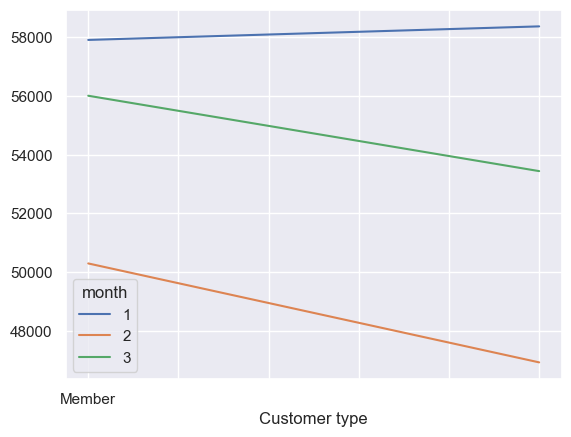

In [789]:
customer_type_sale_3_month = pd.pivot_table(df,values='Total',index='Customer type',columns='month',aggfunc='sum')
customer_type_sale_3_month.plot()
# seem like the chart was wrong

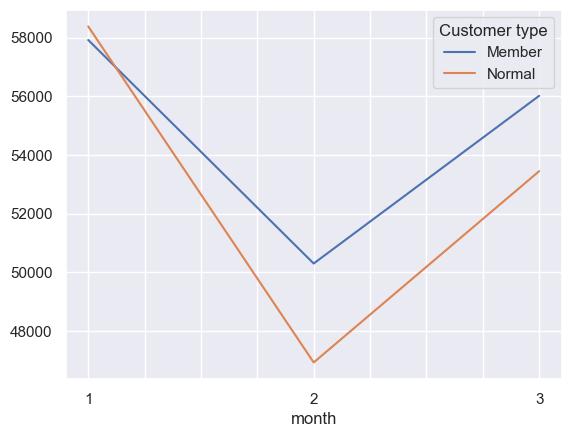

In [823]:
# transpose the table to
transposed_type_sale_3_month = customer_type_sale_3_month.T
# plot the chart
transposed_type_sale_3_month.plot()
plt.show()

## Pivot table in pandas: pandas.pivot_table
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, 
margins=False, dropna=True, margins_name='All', observed=False, sort=True)

In [797]:
# other solution with other way to create the pivot table
pd.pivot_table(df,values='Total',index='month',columns='Customer type',aggfunc='sum')

Customer type,Member,Normal
month,,
1,57914.829,58377.039
2,50296.050,46923.324
3,56012.565,53442.942


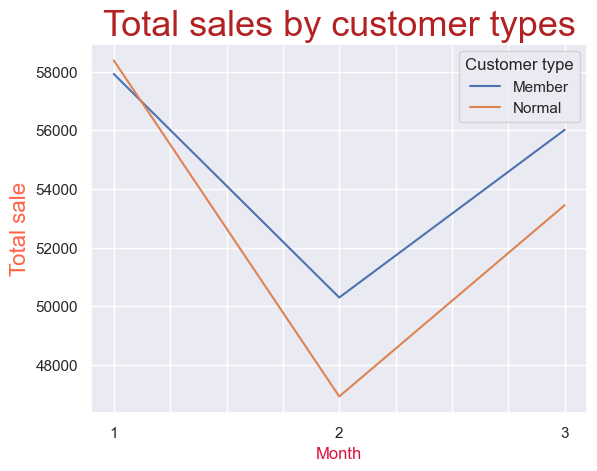

In [826]:
sale_by_customer_type_over_month = pd.pivot_table(df,values='Total',index='month',columns='Customer type',aggfunc='sum')
sale_by_customer_type_over_month.plot(kind='line')
### modify the label, tile, fontsize, color around the plot
plt.xlabel('Month',fontsize=12,color='crimson')
plt.ylabel('Total sale',fontsize=16,color='tomato')
### rename the title of plot
plt.title('Total sales by customer types',fontsize=26,color='firebrick')
### grid on
plt.grid(True)
### create a chart as the aboved formats

In [844]:
## create a pivot table with multiples specific agggregate function for each column values
pd.pivot_table(df,
    values=None,
    index='month',
    columns='Customer type',
    aggfunc={'Quantity': np.sum,'Rating': np.mean,'Tax 5%':np.sum,'Total':np.sum,'Unit price':np.mean,
             'cogs':np.mean,'gross income':np.sum,'gross margin percentage':np.mean})
# or: pd.pivot_table(df,values=None,index='month',columns='Customer type', aggfunc={'Quantity': sum,'Rating': np.mean,'Tax 5%':sum,'Total':sum,'Unit price':np.mean,'cogs':np.mean,'gross income':sum,'gross margin percentage':np.mean})

Quantity           Rating              Tax 5%            \
Customer type   Member Normal    Member    Normal    Member    Normal   
month                                                                   
1                  964   1001  6.972674  7.060556  2757.849  2779.859   
2                  838    816  7.017178  7.134286  2395.050  2234.444   
3                  983    908  6.831325  6.848603  2667.265  2544.902   

                   Total            Unit price                   cogs  \
Customer type     Member     Normal     Member     Normal      Member   
month                                                                   
1              57914.829  58377.039  57.598198  54.705556  320.680116   
2              50296.050  46923.324  57.374172  55.768071  293.871166   
3              56012.565  53442.942  53.619398  55.072067  321.357229   

                          gross income           gross margin percentage  \
Customer type      Normal       Member    Normal                  Member   
month                                                                      
1              308.873222     2757.849  2779.859                4.761905   
2              319.206286     2395.050  2234.444                4.761905   
3              284.346592     2667.265  2544.902                4.761905   

                         
Customer type    Normal  
month                    
1              4.761905  
2              4.761905  
3              4.761905

### 4. Total income by Customer types over 3 months?

In [828]:
pd.pivot_table(df,
    values='gross income',
    index='month',
    columns='Customer type',
    aggfunc='sum')

Customer type,Member,Normal
month,,
1,2757.849,2779.859
2,2395.050,2234.444
3,2667.265,2544.902


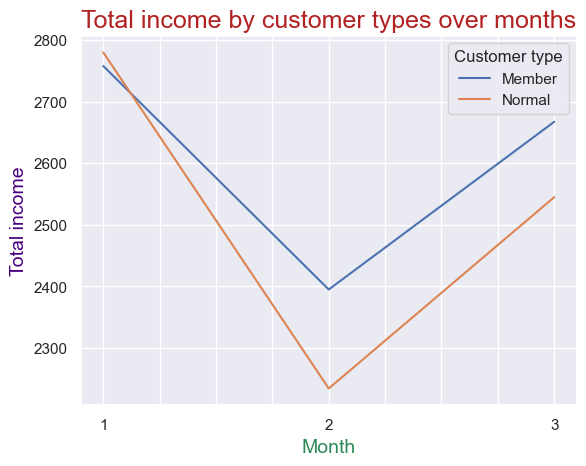

In [853]:
total_income_by_customer_types_over_months = pd.pivot_table(df,
    values='gross income',
    index='month',
    columns='Customer type',
    aggfunc='sum')
total_income_by_customer_types_over_months.plot()
plt.xlabel('Month',fontsize=14,color='seagreen')
plt.ylabel('Total income',fontsize=14,color='indigo')
plt.title('Total income by customer types over months',fontsize=18,color='firebrick')
plt.show()

### 5. Total orders by Customer types over 3 months?

In [867]:
pd.pivot_table(df,values='Invoice ID',index='month',columns='Customer type',
          aggfunc='count')

Customer type,Member,Normal
month,,
1,172,180
2,163,140
3,166,179


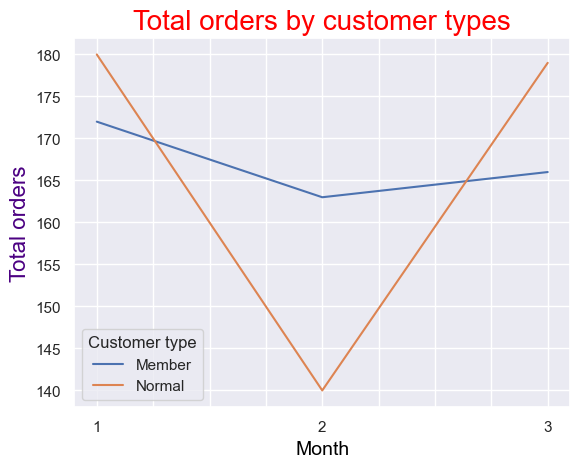

In [873]:
total_orders_by_customer_type_over_month = pd.pivot_table(df,values='Invoice ID',index='month',columns='Customer type',
          aggfunc='count')
total_orders_by_customer_type_over_month.plot()
plt.xlabel('Month',color='black',fontsize=14)
plt.ylabel('Total orders',color='indigo',fontsize=16)
plt.title('Total orders by customer types',color='red',fontsize=20)
plt.show()

### 6. Total orders by payment over 3 months?

In [878]:
pd.pivot_table(df,values='Invoice ID',index='month',columns='Payment',aggfunc='count',margins='True')

Payment,Cash,Credit card,Ewallet,All
month,,,,
1,122,113,117,352
2,112,90,101,303
3,110,108,127,345
All,344,311,345,1000


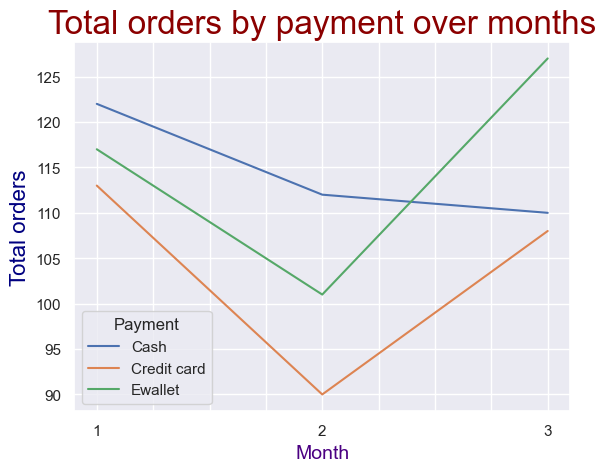

In [883]:
total_orders_by_payment_over_months = pd.pivot_table(df,values='Invoice ID',index='month',columns='Payment',aggfunc='count')
total_orders_by_payment_over_months.plot()
plt.xlabel('Month',fontsize=14,color='indigo')
plt.ylabel('Total orders',fontsize=16,color='navy')
plt.title('Total orders by payment over months',fontsize=24,color='darkred')
plt.show()

### 7. Total sales by product lines over 3 months?

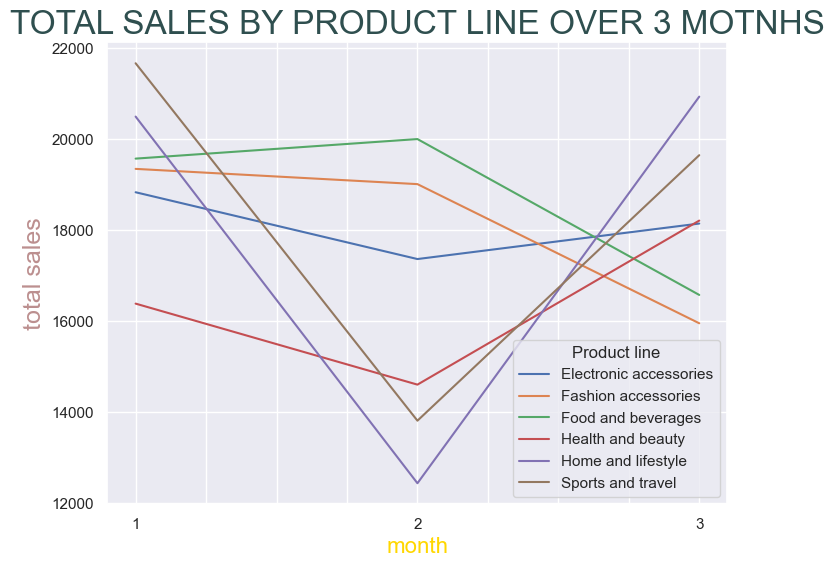

In [905]:
pd.pivot_table(df,values='Total',index='month',columns='Product line',aggfunc=sum).plot(figsize=(8,6))
plt.xlabel('month',color='gold',fontsize='16')
plt.ylabel('total sales',fontsize='18',color='rosybrown')
plt.title('TOTAL SALES BY PRODUCT LINE OVER 3 MOTNHS',fontsize=24,color='DarkSlateGray')
plt.show()

### 8. Total income by product lines over 3 months?

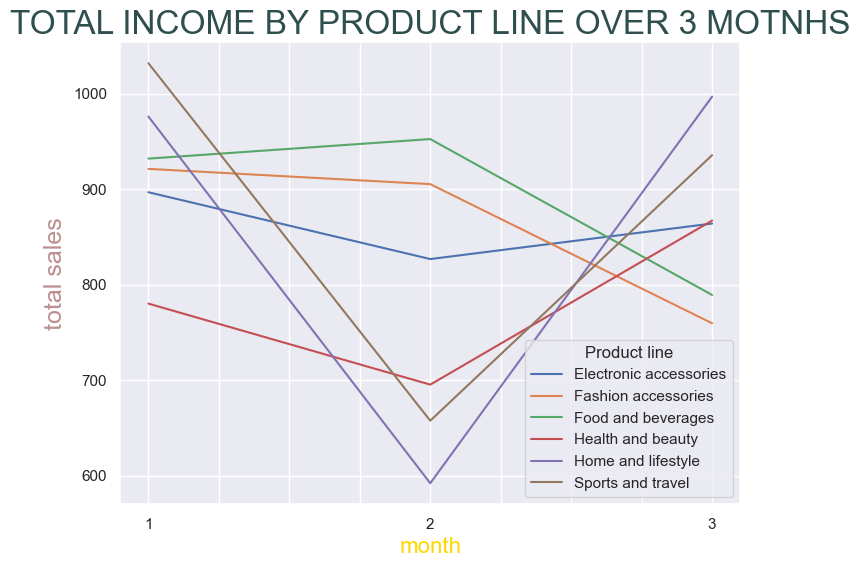

In [906]:
pd.pivot_table(df,values='gross income',index='month',columns='Product line',aggfunc=sum).plot(figsize=(8,6))
plt.xlabel('month',color='gold',fontsize='16')
plt.ylabel('total sales',fontsize='18',color='rosybrown')
plt.title('TOTAL INCOME BY PRODUCT LINE OVER 3 MOTNHS',fontsize=24,color='DarkSlateGray')
plt.show()

## ABOUT GENDER

### 1. Customer types by gender?

In [910]:
pd.pivot_table(df,index='Gender',columns='Customer type',aggfunc='count',values='Invoice ID')

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


In [45]:
df.groupby(['Gender']).agg({'Unit price':np.mean,'Quantity': np.sum,'Tax 5%': np.sum,'Total':np.sum,'cogs':np.sum,'gross margin percentage':np.mean,'Unit price':np.mean,
             'gross income':np.sum,'Rating': np.mean})

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,
Female,55.263952,2869,7994.425,167882.925,159888.50,4.761905,7994.425,6.964471
Male,56.081944,2641,7384.944,155083.824,147698.88,4.761905,7384.944,6.980962


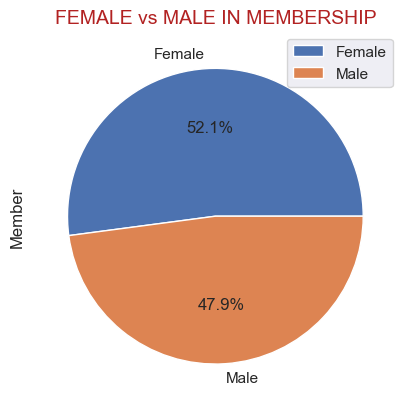

In [927]:
customer_type_by_gender = pd.pivot_table(df,index='Gender',columns='Customer type',aggfunc='count',values='Invoice ID')
customer_type_by_gender['Member'].plot(kind='pie',autopct='%1.1f%%',legend='True')
plt.title('FEMALE vs MALE IN MEMBERSHIP',color='firebrick',size='14')
plt.show()

Our member policy is prefered by female customers, why are male customers not intersted in the membership program?

### 2. Payment methods by gender?

In [919]:
pd.pivot_table(df,index='Payment',columns='Gender',aggfunc='count',values='Invoice ID')

Gender,Female,Male
Payment,,
Cash,178,166
Credit card,163,148
Ewallet,160,185


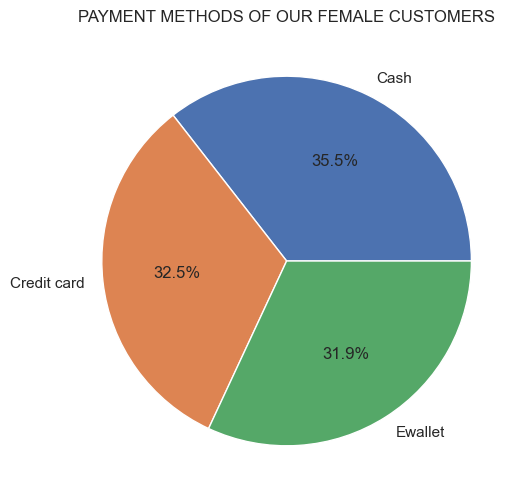

Our female customers are prefer to pay by cash, credit card


In [959]:
payment_by_gender = pd.pivot_table(df,index='Payment',columns='Gender',aggfunc='count',values='Invoice ID')
payment_by_female = payment_by_gender['Female']
payment_by_female.plot(kind='pie',autopct='%1.1f%%',figsize=(12,6),ylabel='')
plt.title('PAYMENT METHODS OF OUR FEMALE CUSTOMERS')
plt.show()

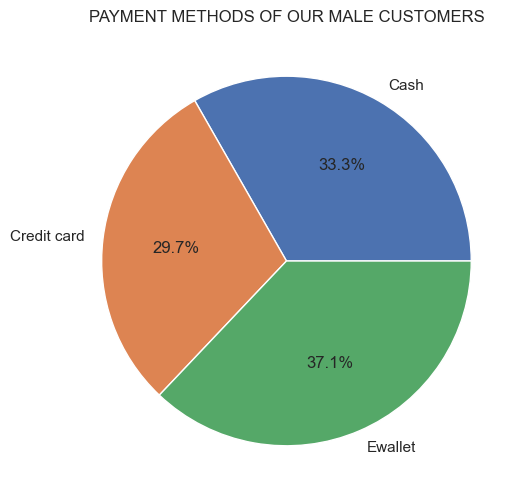

In [956]:
payment_by_gender = pd.pivot_table(df,index='Payment',columns='Gender',aggfunc='count',values='Invoice ID')
payment_by_male = payment_by_gender['Male']
payment_by_male.plot(kind='pie',autopct='%1.1f%%',figsize=(12,6),ylabel='')
plt.title('PAYMENT METHODS OF OUR MALE CUSTOMERS')
plt.show()

Our male customers are prefer to pay by Ewallet, cash

### 3. Product lines by gender?

In [1069]:
pd.pivot_table(df,index='Product line',columns='Gender',values='Invoice ID',aggfunc='count')

Gender,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


In [1082]:
pd.pivot_table(df,index='Product line',columns='Gender',values='Invoice ID',aggfunc='count',margins=True)

Gender,Female,Male,All
Product line,,,
Electronic accessories,84,86,170
Fashion accessories,96,82,178
Food and beverages,90,84,174
Health and beauty,64,88,152
Home and lifestyle,79,81,160
Sports and travel,88,78,166
All,501,499,1000


In [1109]:
order_by_gender_and_product_line = pd.pivot_table(df,index='Product line',columns='Gender',values='Invoice ID',aggfunc='count')

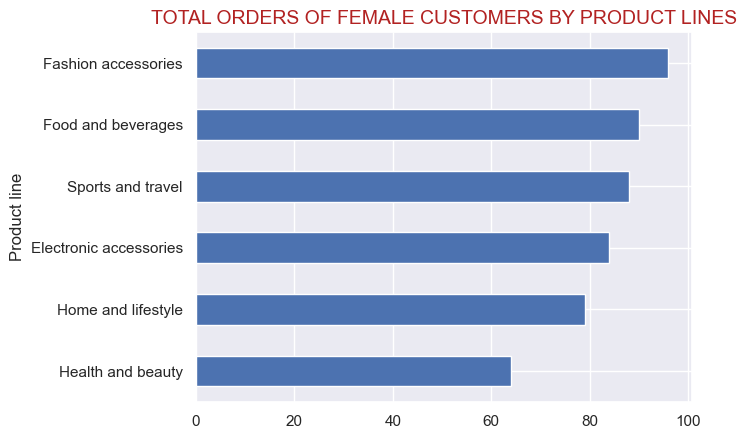

In [1259]:
order_by_gender_and_product_line['Female'].sort_values(ascending=True).plot(kind='barh',ylabel='')
plt.title('TOTAL ORDERS OF FEMALE CUSTOMERS BY PRODUCT LINES',fontsize=14,color='firebrick')
plt.show()

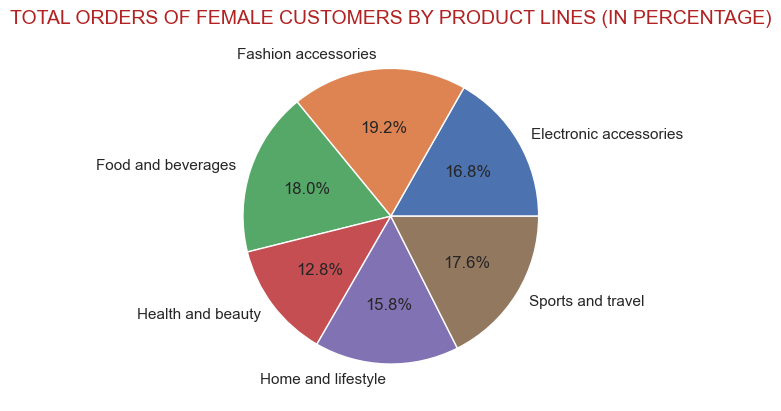

In [1260]:
order_by_gender_and_product_line['Female'].plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title('TOTAL ORDERS OF FEMALE CUSTOMERS BY PRODUCT LINES (IN PERCENTAGE)',fontsize=14,color='firebrick')
plt.show()

Conclusion: female customers are most interested in our belowed product lines: Fashion accesssories, food and beverages, sports and tralvel

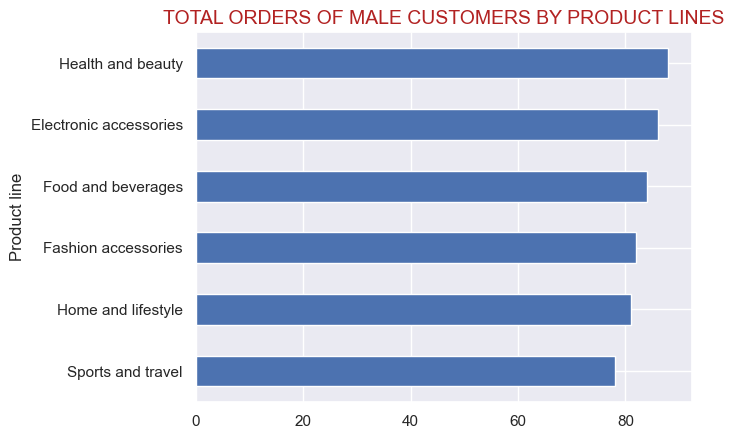

In [1261]:
order_by_gender_and_product_line['Male'].sort_values(ascending=True).plot(kind='barh',ylabel='')
plt.title('TOTAL ORDERS OF MALE CUSTOMERS BY PRODUCT LINES',fontsize=14,color='firebrick')
plt.show()

Conclusion: male customers are most interested in our belowed product lines: Health and beauty, electronic accessories, food and beverages

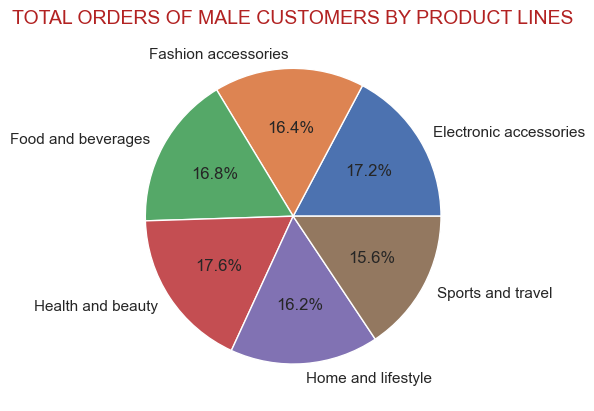

In [1262]:
order_by_gender_and_product_line['Male'].plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title('TOTAL ORDERS OF MALE CUSTOMERS BY PRODUCT LINES',fontsize=14,color='firebrick')
plt.show()

### 4. Order date by gender?

In [1138]:
pd.pivot_table(df,values='Invoice ID',index='day',columns='Gender',aggfunc='count')

Gender,Female,Male
day,,
1,16,12
2,24,16
3,15,21
4,18,11
5,27,14
6,14,19
7,18,20
8,25,16
9,17,20


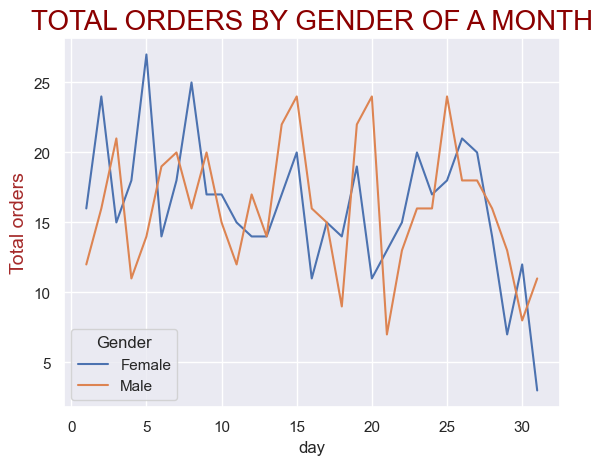

In [1144]:
pd.pivot_table(df,values='Invoice ID',index='day',columns='Gender',aggfunc='count').plot(kind='line')
plt.title('TOTAL ORDERS BY GENDER OF A MONTH',fontsize=20,color='darkred')
plt.ylabel('Total orders',fontsize=14,color='brown')
plt.show()

### 5. Items quantity by gender?

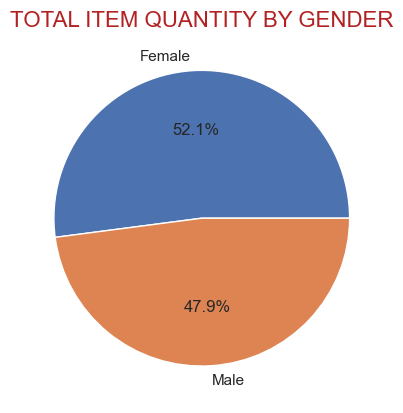

In [1155]:
df.groupby(['Gender']).sum()['Quantity'].plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title('TOTAL ITEM QUANTITY BY GENDER',color='firebrick',fontsize=16)
plt.show()

## ABOUT CUSTOMER TYPES

### 1. Customer type of each branches

In [46]:
df.groupby(['Customer type']).agg({'Unit price':np.mean,'Quantity': np.sum,'Tax 5%': np.sum,'Total':np.sum,'cogs':np.sum,'gross margin percentage':np.mean,'Unit price':np.mean,
             'gross income':np.sum,'Rating': np.mean})

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Customer type,,,,,,,,
Member,56.206986,2785,7820.164,164223.444,156403.28,4.761905,7820.164,6.940319
Normal,55.135130,2725,7559.205,158743.305,151184.10,4.761905,7559.205,7.005210


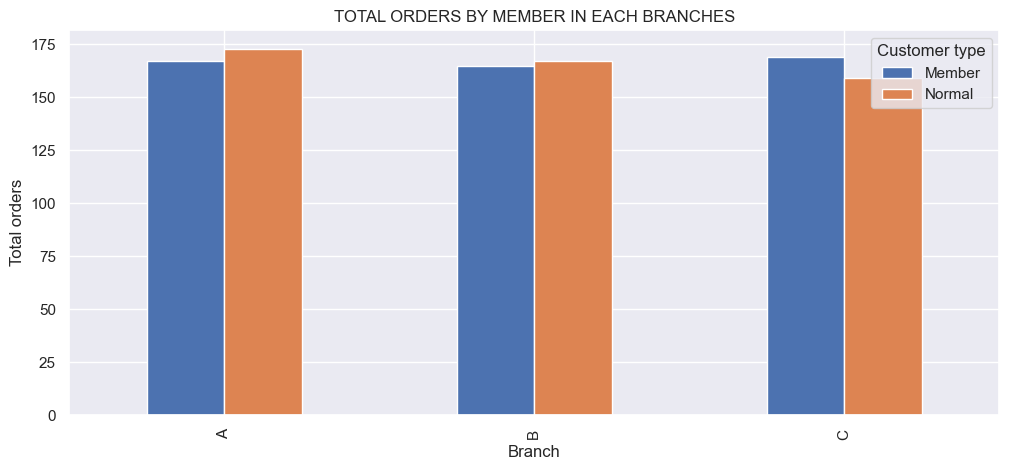

In [1168]:
pd.pivot_table(df,values='Invoice ID',index='Branch',columns='Customer type',aggfunc='count').plot(kind='bar',figsize=(12,5))
plt.ylabel('Total orders')
plt.title('TOTAL ORDERS BY MEMBER IN EACH BRANCHES')
plt.show()

## 2. Payment by customer types

In [1169]:
pd.pivot_table(df,index='Payment',columns='Customer type',values='Invoice ID',aggfunc='count')

Customer type,Member,Normal
Payment,,
Cash,168,176
Credit card,172,139
Ewallet,161,184


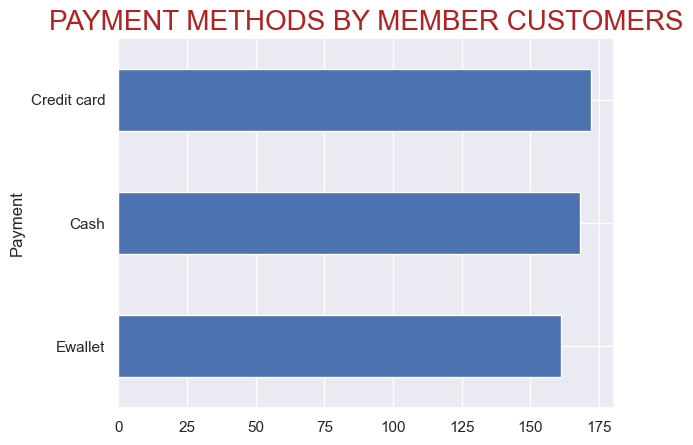

In [1180]:
# which payment method are prefered by our member customers?
pd.pivot_table(df,index='Payment',columns='Customer type',values='Invoice ID',aggfunc='count')['Member'].sort_values(ascending=True).plot(kind='barh')
plt.title('PAYMENT METHODS BY MEMBER CUSTOMERS',fontsize=20,color='firebrick')
plt.show()

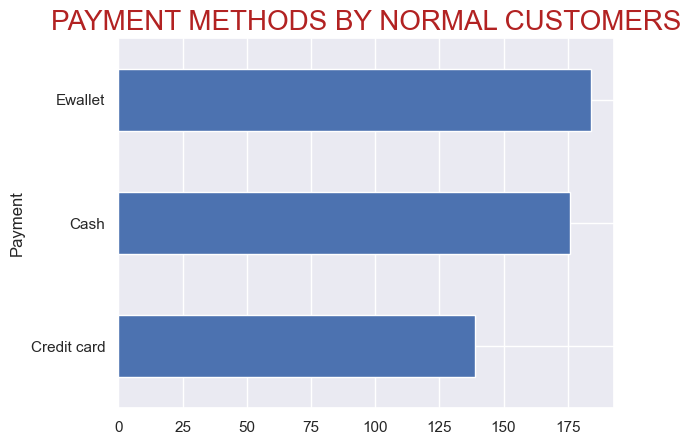

In [1181]:
# which payment method are prefered by our normal customers?
pd.pivot_table(df,index='Payment',columns='Customer type',values='Invoice ID',aggfunc='count')['Normal'].sort_values(ascending=True).plot(kind='barh')
plt.title('PAYMENT METHODS BY NORMAL CUSTOMERS',fontsize=20,color='firebrick')
plt.show()

## 3. Product lines by customer types

In [1188]:
pd.pivot_table(df,index='Product line',columns='Customer type',values='Invoice ID',aggfunc='count').sort_values(by='Member',ascending=False)

Customer type,Member,Normal
Product line,,
Food and beverages,94,80
Sports and travel,87,79
Fashion accessories,86,92
Home and lifestyle,83,77
Electronic accessories,78,92
Health and beauty,73,79


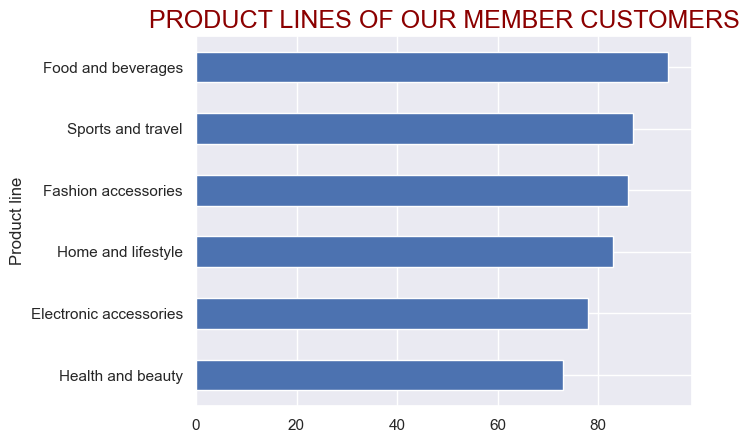

In [1195]:
# which product lines are prefered by our member customers?
pd.pivot_table(df,index='Product line',columns='Customer type',values='Invoice ID',aggfunc='count')['Member'].sort_values(ascending=True).plot(kind='barh')
plt.title('PRODUCT LINES OF OUR MEMBER CUSTOMERS',fontsize=18,color='darkred')
plt.show()

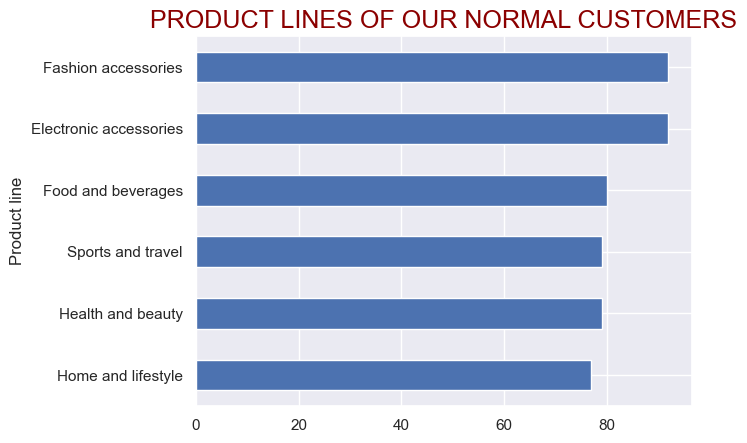

In [1196]:
# which product lines are prefered by our normal customers?
pd.pivot_table(df,index='Product line',columns='Customer type',values='Invoice ID',aggfunc='count')['Normal'].sort_values(ascending=True).plot(kind='barh')
plt.title('PRODUCT LINES OF OUR NORMAL CUSTOMERS',fontsize=18,color='darkred')
plt.show()

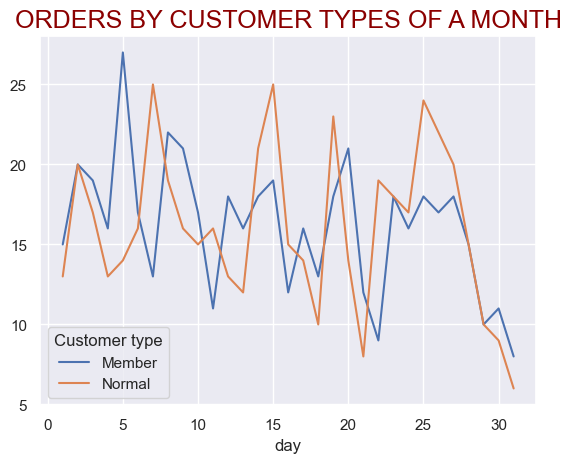

In [1197]:
pd.pivot_table(df,index='day',columns='Customer type',values='Invoice ID',aggfunc='count').plot(kind='line')
plt.title('ORDERS BY CUSTOMER TYPES OF A MONTH',fontsize=18,color='darkred')
plt.show()

In [1215]:
# the total quantity by product lines and customer types
pd.pivot_table(df,values='Quantity',columns='Customer type',index='Product line',aggfunc=sum).sort_values(by='Member',ascending=False)

Customer type,Member,Normal
Product line,,
Food and beverages,506,446
Sports and travel,493,427
Home and lifestyle,490,421
Fashion accessories,439,463
Electronic accessories,429,542
Health and beauty,428,426


In [1217]:
# the total gross income by product lines and customer types
pd.pivot_table(df,values='gross income',columns='Customer type',index='Product line',aggfunc=sum).sort_values(by='Member',ascending=False).round(2)

Customer type,Member,Normal
Product line,,
Food and beverages,1493.22,1180.34
Sports and travel,1344.49,1280.41
Home and lifestyle,1332.29,1232.57
Fashion accessories,1253.52,1332.47
Health and beauty,1230.05,1112.51
Electronic accessories,1166.60,1420.91


## ABOUT RATING

## 1. Rating by customer types

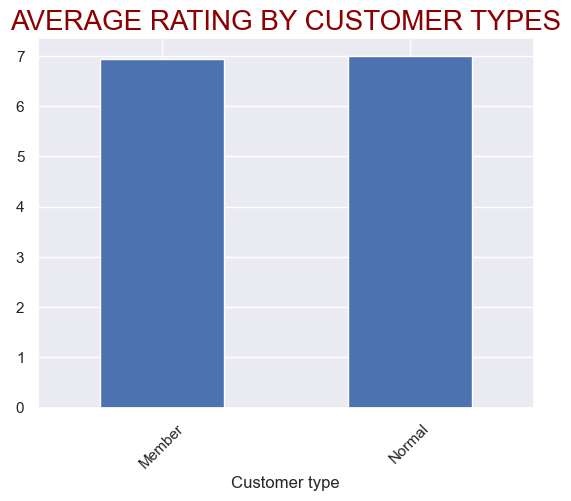

In [1222]:
df.groupby(['Customer type']).mean()['Rating'].plot(kind='bar',rot=45)
plt.title('AVERAGE RATING BY CUSTOMER TYPES',fontsize=20,color='darkred')
plt.grid(True)
plt.show()

## 2. Rating by branches

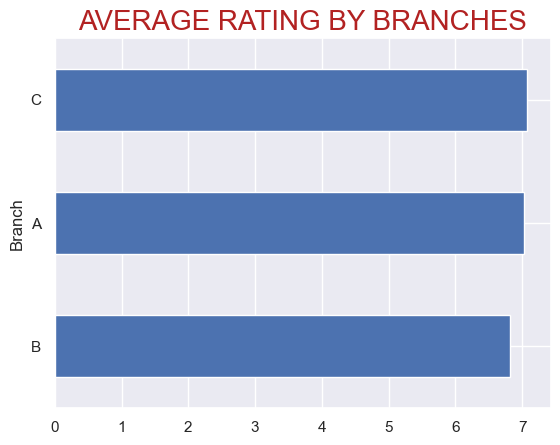

In [1228]:
df.groupby(['Branch']).mean()['Rating'].sort_values(ascending=True).plot(kind='barh')
plt.title('AVERAGE RATING BY BRANCHES',fontsize=20,color='firebrick')
plt.show()

## 3. Rating by gender

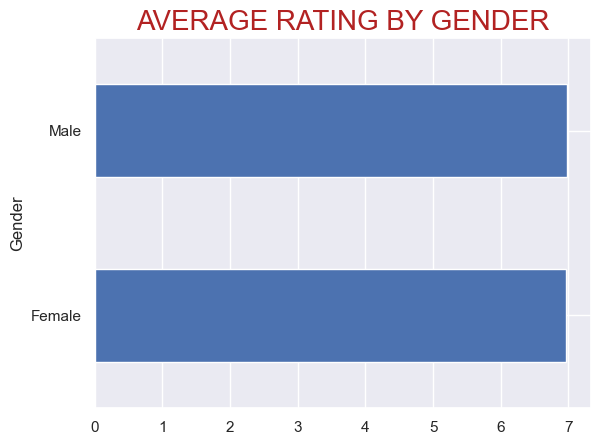

In [1232]:
df.groupby(['Gender']).mean()['Rating'].sort_values(ascending=True).plot(kind='barh')
plt.title('AVERAGE RATING BY GENDER',fontsize=20,color='firebrick')
plt.show()

## 4. Rating by product lines

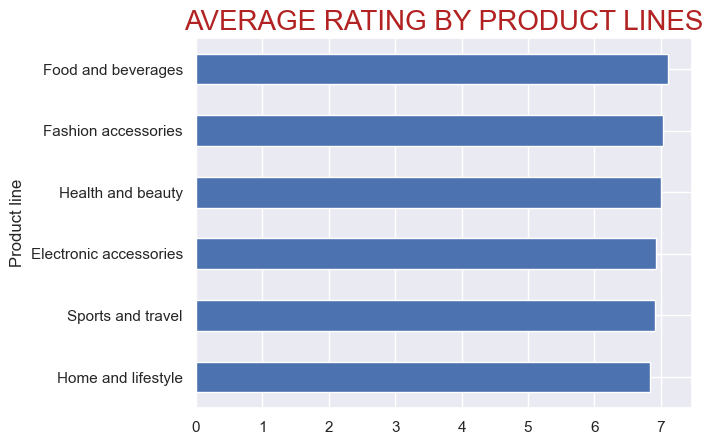

In [1236]:
df.groupby(['Product line']).mean()['Rating'].sort_values(ascending=True).plot(kind='barh')
plt.title('AVERAGE RATING BY PRODUCT LINES',fontsize=20,color='firebrick')
plt.show()

## 5. Rating by months

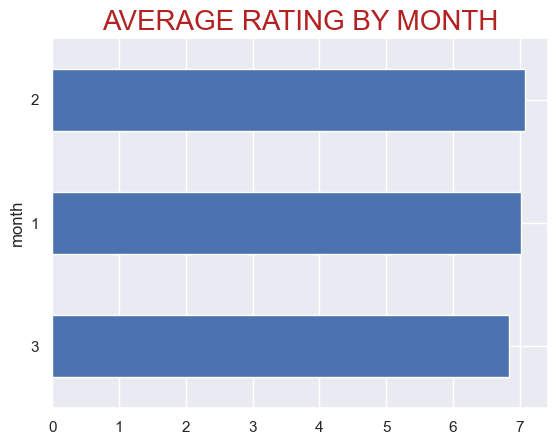

In [1234]:
df.groupby(['month']).mean()['Rating'].sort_values(ascending=True).plot(kind='barh')
plt.title('AVERAGE RATING BY MONTH',fontsize=20,color='firebrick')
plt.show()

## 6. Rating of a month

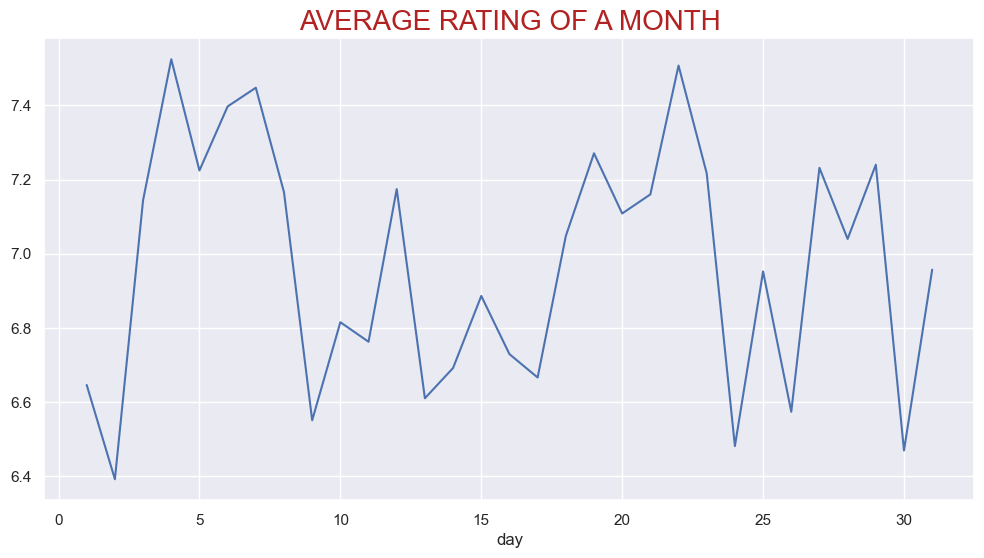

In [1257]:
df.groupby(['day']).mean()['Rating'].plot(kind='line',figsize=(12,6))
plt.title('AVERAGE RATING OF A MONTH',fontsize=20,color='firebrick')
plt.show()

## ABOUT PRODUCT LINES

In [48]:
df.groupby(['Product line']).agg({'Unit price':np.mean,'Quantity': np.sum,'Tax 5%': np.sum,'Total':np.sum,'cogs':np.sum,'gross margin percentage':np.mean,'Unit price':np.mean,
             'gross income':np.sum,'Rating': np.mean})

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,
Electronic accessories,53.551588,971,2587.5015,54337.5315,51750.03,4.761905,2587.5015,6.924706
Fashion accessories,57.153652,902,2585.9950,54305.8950,51719.90,4.761905,2585.9950,7.029213
Food and beverages,56.008851,952,2673.5640,56144.8440,53471.28,4.761905,2673.5640,7.113218
Health and beauty,54.854474,854,2342.5590,49193.7390,46851.18,4.761905,2342.5590,7.003289
Home and lifestyle,55.316937,911,2564.8530,53861.9130,51297.06,4.761905,2564.8530,6.837500
Sports and travel,56.993253,920,2624.8965,55122.8265,52497.93,4.761905,2624.8965,6.916265


### 1. Product lines by branches

In [1271]:
pd.pivot_table(df,values='Invoice ID',columns='Branch',index='Product line',aggfunc='count').sort_values(by='A',ascending=False)

Branch,A,B,C
Product line,,,
Home and lifestyle,65,50,45
Electronic accessories,60,55,55
Sports and travel,59,62,45
Food and beverages,58,50,66
Fashion accessories,51,62,65
Health and beauty,47,53,52


<AxesSubplot:xlabel='Branch'>

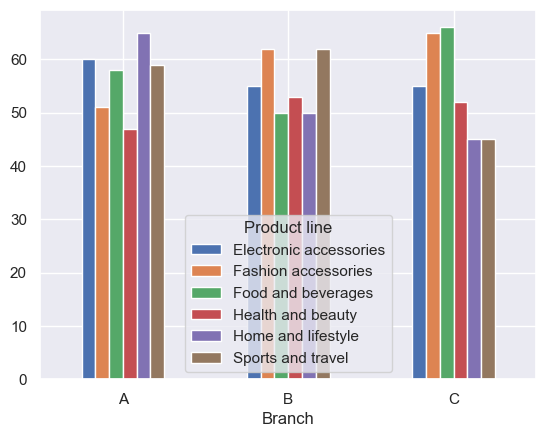

In [1281]:
pd.pivot_table(df,values='Invoice ID',columns='Product line',index='Branch',aggfunc='count').plot(kind='bar',rot=0)

### 2. Product lines by payment

In [1286]:
pd.pivot_table(df,values='Invoice ID',columns='Product line',index='Payment',aggfunc='count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Payment,,,,,,
Cash,71,57,57,49,51,59
Credit card,46,56,61,50,45,53
Ewallet,53,65,56,53,64,54


<AxesSubplot:xlabel='Payment'>

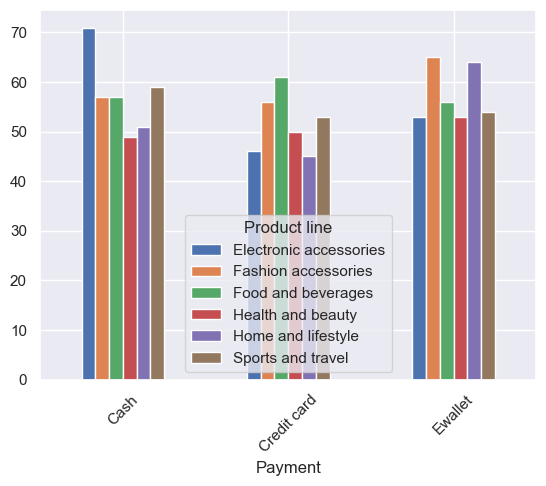

In [1285]:
pd.pivot_table(df,values='Invoice ID',columns='Product line',index='Payment',aggfunc='count').plot(kind='bar',rot=45)

### 3. The total sales by product line?

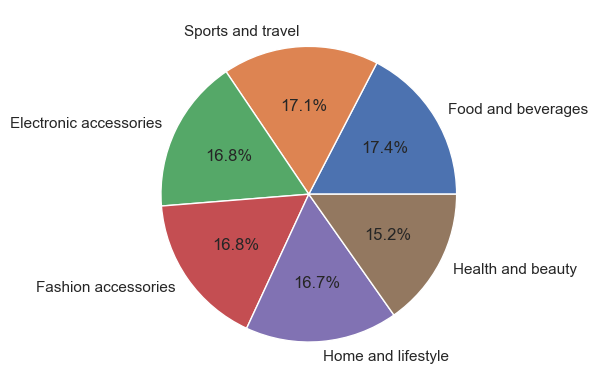

In [1040]:
df.groupby(['Product line']).sum()['Total'].sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.show()

# Total by branches

## Group by with multiple aggregate functions in pandas

In [51]:
# group by with only sum() function
df.groupby(['Branch']).sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


In [50]:
# group by with specific aggregate function for each column
df.groupby(['Branch']).agg({'Unit price':np.mean,'Quantity': np.sum,'Tax 5%': np.sum,'Total':np.sum,'cogs':np.sum,'gross margin percentage':np.mean,'Unit price':np.mean,
             'gross income':np.sum,'Rating': np.mean})

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,54.780853,1859,5057.1605,106200.3705,101143.21,4.761905,5057.1605,7.027059
B,55.659277,1820,5057.0320,106197.6720,101140.64,4.761905,5057.0320,6.818072
C,56.609024,1831,5265.1765,110568.7065,105303.53,4.761905,5265.1765,7.072866


In [58]:
branch_other_value = df.groupby(['Branch']).agg({'Unit price':np.mean,'Quantity': np.sum,'Tax 5%': np.sum,'Total':np.sum,'cogs':np.sum,'gross margin percentage':np.mean,'Unit price':np.mean,
             'gross income':np.sum,'Rating': np.mean})

## Create a 'total orders' table

In [64]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [76]:
# count the total order by branches
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [75]:
# reset index
df.Branch.value_counts().reset_index()

,index,Branch
0,A,340
1,B,332
2,C,328


In [77]:
#rename for columns name of the table
df.Branch.value_counts().reset_index().rename(columns = {'index':'Branch','Branch':'Total Orders'})

,Branch,Total Orders
0,A,340
1,B,332
2,C,328


In [78]:
# declare dataframe
total_order_by_branches_df = df.Branch.value_counts().reset_index().rename(columns = {'index':'Branch','Branch':'Total Orders'})

# Merging 2 tables to get  full info by branches

In [84]:
branch_other_value

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,54.780853,1859,5057.1605,106200.3705,101143.21,4.761905,5057.1605,7.027059
B,55.659277,1820,5057.0320,106197.6720,101140.64,4.761905,5057.0320,6.818072
C,56.609024,1831,5265.1765,110568.7065,105303.53,4.761905,5265.1765,7.072866


In [83]:
# merge 2 tables
branch_other_value.merge(total_order_by_branches_df,how='inner',left_on='Branch',right_on='Branch')

,Branch,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Total Orders
0,A,54.780853,1859,5057.1605,106200.3705,101143.21,4.761905,5057.1605,7.027059,340
1,B,55.659277,1820,5057.0320,106197.6720,101140.64,4.761905,5057.0320,6.818072,332
2,C,56.609024,1831,5265.1765,110568.7065,105303.53,4.761905,5265.1765,7.072866,328


## Final output for 'total info by branches'

In [85]:
total_order_by_branches_df.merge(branch_other_value,how='inner',left_on='Branch',right_on='Branch')

,Branch,Total Orders,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,A,340,54.780853,1859,5057.1605,106200.3705,101143.21,4.761905,5057.1605,7.027059
1,B,332,55.659277,1820,5057.0320,106197.6720,101140.64,4.761905,5057.0320,6.818072
2,C,328,56.609024,1831,5265.1765,110568.7065,105303.53,4.761905,5265.1765,7.072866
